# Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `SC_HW1_bank_data.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [ ]:
import pandas as pd
import numpy as np

## Input Dataset

In [ ]:
#Membaca data dan memasukkannya ke dalam bentuk Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/SC_HW1_bank_data.csv')
df

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#Jalankan code untuk mengecek nama kolom yang tersedia
df.columns

Index(['RowNumber', 'CustomerId', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
#Hilangkan kolom yang dirasa tidak relevan dengan model (contoh: ID). None dapat diisi dengan nama-nama kolom yang akan digunakan.
#Contoh df = df[['X1','X2', 'Y']].copy()

#START CODE
df = df[['Geography',	'Gender',	'Age',	'Tenure',	'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']].copy()
df

,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Preprocessing

In [ ]:
#Lakukan One-Hot Encoder untuk data categorical, dengan fungsi pandas get_dummies

#START CODE
df = pd.get_dummies(df,columns=['Geography', 'Gender'], drop_first = True)

In [ ]:
#Pisahkan mana X (feature) dengan Y,
#Y adalah kolom "Exited"

#START CODE
X = df.drop('Exited',axis = 1)
y = df['Exited']

In [ ]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import MinMaxScaler

#START CODE
scaler = MinMaxScaler()
X_transform = scaler.fit_transform(X)

In [ ]:
#Ini digunakan jika dilakukan scaler/Normalisas. Jika tidak, code ini bisa dilewat dan diganti dengan code yang ada di dalam komen
X_transform = pd.DataFrame(X_transform, columns = X.columns)
#X_transform = X.copy()

## Train-Test Split

In [ ]:
#Split menjadi train dan test dengan test_size 25%
#Tidak perlu mengubah code ini

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.25,random_state = 42)

In [ ]:
X_train

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
4901,0.554054,0.0,0.709683,0.333333,0.0,1.0,0.105271,0.0,0.0,1.0
4375,0.310811,0.8,0.242651,0.000000,1.0,0.0,0.159086,1.0,0.0,1.0
6698,0.175676,0.6,0.000000,0.000000,0.0,0.0,0.306604,0.0,0.0,0.0
9805,0.202703,0.7,0.695786,0.000000,0.0,1.0,0.219679,0.0,0.0,1.0
1101,0.148649,0.9,0.000000,0.333333,1.0,0.0,0.253364,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5734,0.486486,0.8,0.277853,0.000000,1.0,1.0,0.346880,0.0,0.0,1.0
5191,0.540541,0.1,0.000000,0.000000,1.0,1.0,0.003475,0.0,0.0,0.0
5390,0.270270,0.1,0.000000,0.666667,0.0,0.0,0.461087,0.0,0.0,0.0
860,0.337838,0.8,0.758186,0.000000,1.0,0.0,0.487529,0.0,0.0,1.0


In [ ]:
X_test

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,0.189189,0.3,0.385452,0.333333,0.0,0.0,0.208904,1.0,0.0,1.0
4684,0.337838,0.1,0.000000,0.333333,1.0,1.0,0.731908,0.0,0.0,1.0
1731,0.351351,0.4,0.000000,0.333333,1.0,0.0,0.292777,0.0,1.0,0.0
4742,0.554054,0.8,0.474902,0.333333,1.0,1.0,0.853422,1.0,0.0,1.0
4521,0.121622,0.7,0.498194,0.000000,1.0,1.0,0.573346,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4862,0.500000,0.1,0.532793,0.000000,0.0,1.0,0.085428,0.0,1.0,0.0
7025,0.445946,0.3,0.000000,0.666667,1.0,0.0,0.375403,0.0,1.0,0.0
7647,0.094595,0.0,0.312462,0.000000,1.0,1.0,0.041527,0.0,0.0,1.0
7161,0.243243,0.6,0.440340,0.000000,0.0,0.0,0.406443,0.0,0.0,0.0


In [ ]:
y_train

4901    1
4375    0
6698    0
9805    0
1101    0
       ..
5734    0
5191    0
5390    1
860     1
7270    0
Name: Exited, Length: 7500, dtype: int64

In [ ]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
4862    0
7025    1
7647    0
7161    0
73      0
Name: Exited, Length: 2500, dtype: int64

# Modeling

## Model1

### Soal :
Jelaskan secara Singkat Model pertama yang digunakan!

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
params1 = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}
#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV
grid_LR = GridSearchCV(
             estimator= model1,
             param_grid= params1,
             scoring = 'accuracy',
             n_jobs = 10, # core cpu yang digunakan
             cv = 10 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid_LR.fit(X_train,y_train)
grid_LR.best_params_

{'C': 0.5, 'tol': 0.1}

In [ ]:
#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred_LR = grid_LR.predict(X_test)

print(classification_report(y_test,y_pred_LR))
print("")
print(accuracy_score(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      2003
           1       0.57      0.19      0.28       497

    accuracy                           0.81      2500
   macro avg       0.70      0.58      0.59      2500
weighted avg       0.78      0.81      0.77      2500


0.8104


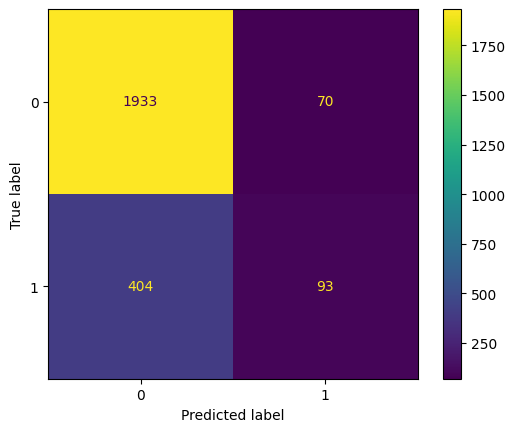

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_LR)
plt.show()

## Model2
### Soal :
Jelaskan secara Singkat Model ke-2 yang digunakan!

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier()

#END CODE

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
from sklearn.model_selection import GridSearchCV

grid2 = GridSearchCV(
    estimator=model2,
    param_grid={'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    scoring='accuracy',
    n_jobs=10,
    cv=10
)

grid2.fit(X_train, y_train)
grid2.best_params_

{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}

In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred_knn = grid2.predict(X_test)

print(classification_report(y_test,y_pred_knn))
print("")
print(accuracy_score(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      2003
           1       0.65      0.32      0.43       497

    accuracy                           0.83      2500
   macro avg       0.75      0.64      0.66      2500
weighted avg       0.81      0.83      0.81      2500


0.8304


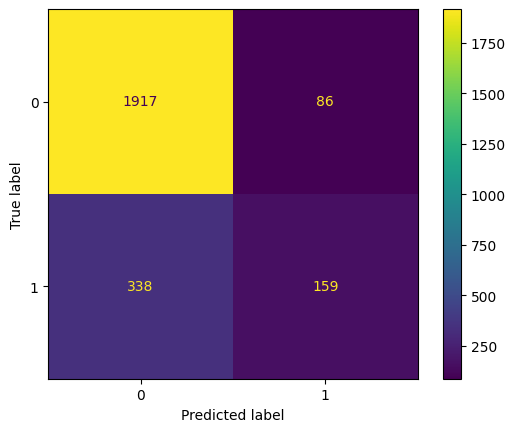

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
plt.show()

## Model3
### Soal :
Jelaskan secara Singkat Model ke-3 yang digunakan!

In [ ]:
#Pilih salah satu metode Machine Leaarning
#Model Machine Learning dapat dipanggil terlebih dahulu melalui library yang digunakan. Gunakan library scikit learn seperti pada contoh

#Contoh pemanggilan library dan penggunaannya dalam model

#from sklearn.linear_model import LogisticRegression
#model1 = LogisticRegression()
#params = { "tol": [0.1,0.01,0.001], 'C':[0.5,1.0,1.5,2.0]}


#START CODE
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=123)
params3 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

#Lakukan parameter tuning sesuai hyperparameter yang dibutuhkan
grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=params3,
    scoring='accuracy',
    n_jobs=10,
    cv=10
)

grid_rf.fit(X_train, y_train)
best_params_rf = grid_rf.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [ ]:
print("Parameter terbaik untuk Random Forest Classifier:")
print(best_params_rf)

Parameter terbaik untuk Random Forest Classifier:
{'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [ ]:
# Buat model Random Forest Classifier dengan parameter terbaik
best_rf_model = RandomForestClassifier(
    random_state=123,
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    max_features=best_params_rf['max_features']
)

# Latih model terbaik pada data pelatihan
best_rf_model.fit(X_train, y_train)

# Prediksi hasil pada data pengujian
y_pred_rf = best_rf_model.predict(X_test)

# Evaluasi model Random Forest Classifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("Hasil Evaluasi Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))
print("Akurasi:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Hasil Evaluasi Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.47      0.59       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.87      0.86      2500

Akurasi: 0.8684
Confusion Matrix:
[[1938   65]
 [ 264  233]]


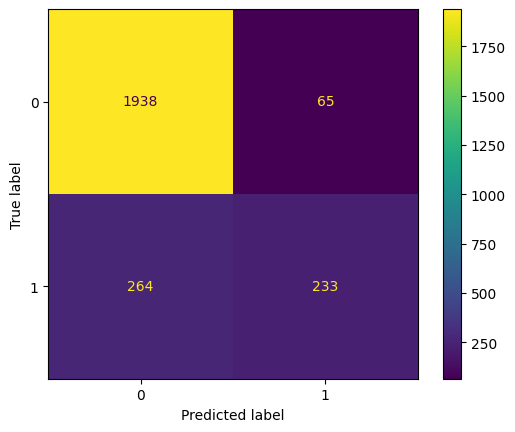

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

## Tarik Kesimpulan Model Mana yang terbaik beserta alasannya

Berdasarkan hasil evaluasi dari ketiga model yang telah dibuat, menurut saya model Random Forest adalah yang terbaik di antara ketiganya. Alasannya yaitu:

1. Akurasi Tinggi: Model Random Forest memiliki akurasi sebesar 0.8684, yang lebih tinggi dibandingkan dengan model Logistic Regression (0.8104) dan model K-Nearest Neighbors (0.8304).

2. F1-Score Tinggi untuk Kelas Positif (1): Model Random Forest memiliki F1-score yang lebih tinggi untuk kelas positif (1) dibandingkan dengan kedua model lainnya. Ini menunjukkan bahwa model Random Forest lebih baik dalam mengidentifikasi kasus positif dengan baik.

3. Recall yang Baik: Recall untuk kelas positif (1) pada model Random Forest adalah 0.47, yang lebih tinggi daripada model Logistic Regression (0.19) dan model K-Nearest Neighbors (0.32).

Dengan demikian, model Random Forest merupakan pilihan terbaik karena memberikan kinerja yang baik dalam hal akurasi, F1-score, dan recall.